In [2]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["scicore"].find({})))
machoke = pd.DataFrame(list(db["machoke"].find({})))
df = df.merge(machoke[['SHA256', 'machoke']], on='SHA256', how='left')

# Scicore Comparison

This notebook is used to compare the tlsh and ssdeep hashes of the scicore dataset.
First I will compare the tlsh hashes and then the ssdeep hashes.



In [3]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN
4,4,OCaml,3eee2da2d713d971e6618b2f089d08e495c0cd8ec722f7...,13173764,{'ssdeep': '49152:lZBmaeQesTwicgVOMB4aJZhYw2UN...,sdhash hash,{'tlsh': 'T1F6D6E80EBB470662CD9809FE8CD5868FD6...,Machoc hash,{'strings': 'T1AC75D50CF4B0A5622CC2F4AFFB0DF68...,NaN
...,...,...,...,...,...,...,...,...,...,...
2061,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2062,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...
2063,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...
2064,1988,ChimPipe,6cbb727cbfb1fb6335e4439ae7810e143e1bcc69b05ca0...,76135,{'ssdeep': '1536:Sw5j4LB3dUalDarob+tltydxgjmzB...,sdhash hash,{'tlsh': 'T101734B13B0959D7AC4478A301AC7823B99...,Machoc hash,{'strings': 'T1CD32B7163C74AAB109D289B2B754859...,NaN


Text(0.5, 1.0, 'Family distribution of the Scicore samples')

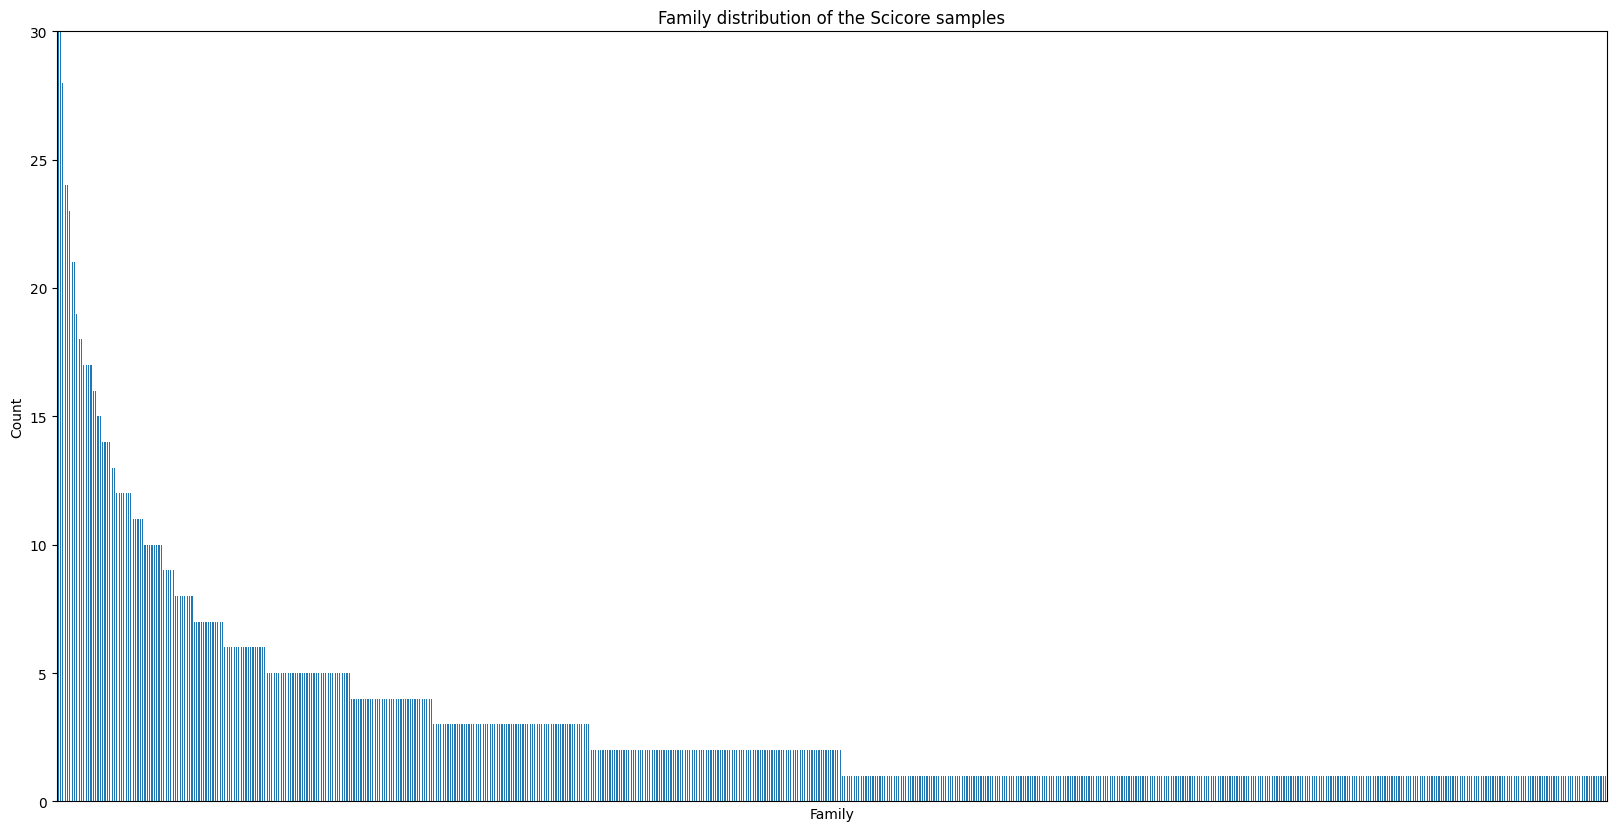

In [4]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]
family_counts.plot(kind='bar', figsize=(20, 10))
plt.xticks([])
plt.ylim(0, 30)
plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Family distribution of the Scicore samples')
#plt.rcParams.update({'font.size': 32})

# Scicore Filtered

This is the filtered dataset with only families that have more than one entry. Since comparing the binary to itself can be done with SHA256, I will skip the families with only 1 entry.

In [5]:
scicore_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...,{'machoke': 'Not a valid binary file /users/st...
...,...,...,...,...,...,...,...,...,...,...
2059,1984,help2man,2a1400af01f63f02b64889eb203ed60eee4014a4d4ded2...,19896,{'ssdeep': '384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeL...,sdhash hash,{'tlsh': 'T1EC92F905EA2A8637B15301F77FDA54C09B...,Machoc hash,{'strings': 'T1FD92E808E81B4677B25341F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2060,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T1BF92F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2061,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2062,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...


In [6]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = scicore_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families in the dataset: {len(family_counts)}")
print(f"Families removed (only had 1 entry): {removed_families}")
print

Original DataFrame had 2066 rows.
Filtered DataFrame has 1740 rows.
Families in the dataset: 660
Families removed (only had 1 entry): ['FastQTL', 'MAKER', 'bwa-mem2', 'CONTRAfold', 'APBS', 'RADtools', 'ChimPipe', 'Gossamer', 'tax2tree', 'andi', 'MOE', 'OpenSSL', 'GeneMark-ET', 'GCC_nvptx_none', 'OPARI2', 'Caffe_unet', 'SKA', 'HipMer', 'Tombo', 'CARNAC-LR', 'Structure', 'Mercurial', 'PhyloBayes-MPI', 'archspec', 'ZORRO', 'COMSOL', 'ruamel.yaml', 'smalt', 'INRICH', 'PASApipeline', 'SCANMS', 'GenomeThreader', 'coevol', 'dashing2', 'Check', 'imake', 'Singularity', 'Miniconda2', 'BLASR', 'circlator', 'MySQL', 'BioPerl', 'MACS', 'EPACTS', 'MaCH', 'panaroo', 'how_are_we_stranded_here', 'NiBabel', 'KisSplice', 'MPJ-Express', 'UCLUST', 'FSA', 'Magic-BLAST', 'ngs-barcode-count-c', 'ProModII', 'bcl2fastq', 'uchime', 'vcflib', 'Pindel', 'LAMMPS', 'clearcut', 'eval', 'Kent_tools', 'Chiron', 'flatbuffers', 'RAD', 'spaln', 'AutoDockSuite', 'FLASH2', 'ELPA', 'Ruby', 'ECL', 'SNAP-HMM', 'Transrate', 'Pi

<function print>

In [7]:
len(scicore_filtered['family'].unique())

334

Example: Get the tlsh hash of the first entry (DIAMOND) and compare to all other entries.

In [8]:
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []

for family, group in scicore_filtered.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    
    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)

    tlsh_diffs = [tlsh.diff(a["tlsh"], b["tlsh"]) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a["ssdeep"], b["ssdeep"]) for a, b in ssdeep_combinations]

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)

<Axes: >

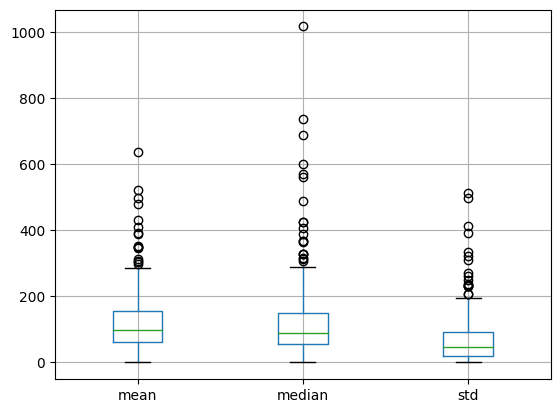

In [9]:
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()

<Axes: >

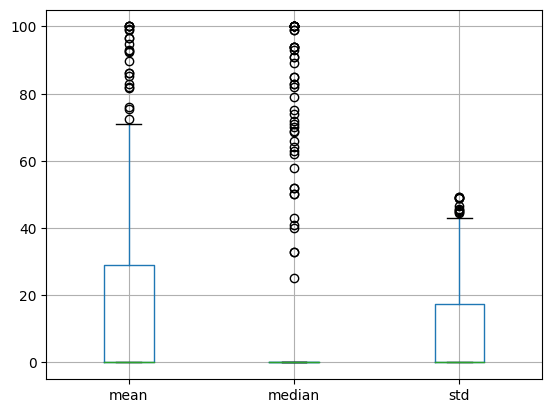

In [10]:
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()

# ROC Curve

To correctly get a ROC curve, 4 values are essential: TP, FP, TN, FN.

The problem currently is, that I do not have other samples which can have no match. All the samples have a match and therefore the TN rate is 0. Thus, I will add the same amount of malware samples and concatenate with the scicore db.

In [11]:
scicore_filtered["malware"] = False
size = scicore_filtered.shape[0] / 20
malware = pd.DataFrame(list(db["malware"].aggregate([{"$sample": {"size": size}}])))
malware["malware"] = True

scicore_concat = pd.concat([scicore_filtered, malware])

scicore_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...,{'machoke': 'Not a valid binary file /users/st...,False
...,...,...,...,...,...,...,...,...,...,...,...
82,656388d93624482ac9d22e39,GandCrab,e4cc623adeb0a43432a4896532a9c3a87d97e7ed7c2da8...,71168,{'ssdeep': '1536:PZZZZZZZZZZZZpXzzzzzzzzzzzzV9...,sdhash hash,{'tlsh': 'T111636A0EA2E1A193E1F357B9FA757E6544...,Machoc hash,{'strings': 'T13FD15C87A5903EBC856612C8C8FA778...,NaN,True
83,65639d233624482ac9d30245,Sakula,0a29b5d068e66cba4a2364ee92601f800f0f24fe9dafca...,81920,{'ssdeep': '1536:coaj1hJL1S9t0MIeboal8bCKxo7h0...,sdhash hash,{'tlsh': 'T1BA835B26B691C033E062113445B9E6735A...,Machoc hash,{'strings': 'T1D3D12997B4AD4D6E508317082C6C765...,NaN,True
84,65639a533624482ac9d2de5e,OnlinerSpambot,0055bf3bff8e1122f0a0ed59a0690eea1758d7882bb313...,1465269,{'ssdeep': '24576:d7k7X4SmWqW4IPw3VDlIQ865M+Ry...,sdhash hash,{'tlsh': 'T1A0651276F191C472D0721A7D9C1AE1D8AE...,Machoc hash,{'strings': 'T1ECC3DF9A655414FB05D33E680D1E33C...,NaN,True
85,65639e143624482ac9d31435,SVCReady,b67120f25963d36560cbb86b35e864f608536abef7c337...,2662762,{'ssdeep': '49152:Vb35xs4wzNhbEv+U9o0A2Ac04qRt...,sdhash hash,{'tlsh': 'T110C533E6603DA336F45AEE34928B2D9419...,Machoc hash,{'strings': 'T1E50422DF54E5A0692CF821F4D75C656...,NaN,True


In [12]:
a = scicore_concat.copy()
b = scicore_concat.copy()
c = scicore_concat.copy()
d = scicore_concat.copy()
a.dropna(subset=['tlsh'], inplace=True)
b.dropna(subset=['ssdeep'], inplace=True)
c.dropna(subset=['strings'], inplace=True)
d.dropna(subset=['machoke'], inplace=True)

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
b['ssdeep'] = b['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

c['strings'] = c['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
c = c[c['strings'] != 'TNULL']

d['machoke'] = d['machoke'].apply(lambda x: x['machoke'] if 'machoke' in x and isinstance(x, dict) else x)

# drop on row "machoke" if it starts with "Not"
d = d[~d['machoke'].str.startswith('Not')]
d = d[~d['machoke'].str.startswith('r2')]

# remove on "machoke" everything after "\t"
d['machoke'] = d['machoke'].apply(lambda x: x.split("\t")[0])

tlsh_df = a.copy()
ssdeep_df = b.copy()
strings_df = c.copy()
machoke_df = d.copy()
machoke_df


,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
26,26,libgd,98323a0d7a04d490c8c3fa65eba54580d6424a105e9ea1...,12256,{'ssdeep': '192:G4MFkE1i1psbJcIflb1U2eVoc8Ngcf...,sdhash hash,{'tlsh': 'T16942944FE76259BFDAD94238588B0B7073...,Machoc hash,{'strings': 'T1EC31784CE67BE47779D73668770E0E1...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
54,46,hwloc,fb0d766180b9b7660a152ac2a8f34038bbfde6d042341c...,18216,{'ssdeep': '192:GnR37uG3EE2ntzHlZfZZJVoRxsXAZs...,sdhash hash,{'tlsh': 'T1D782D98BDAE08937D4E05234589B0A2079...,Machoc hash,{'strings': 'T15871724D2579F53379A22578AA5C4C0...,3db8a17a1a02300e1a02300ec19ce261a02300ea247ec5...,False
55,47,hwloc,53b571e7d5faa63ffab2afadb549c0a217a4018bb8a180...,46688,{'ssdeep': '768:46R8Xdf+eMWtO3lkCKsooHtUJf6nP7...,sdhash hash,{'tlsh': 'T19C231A079BD18479D5E08130A9DB6B12A6...,Machoc hash,{'strings': 'T1663298120FA6D42377E20579FF94BF4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
56,48,hwloc,839236bb57cfcc2db79239f199608ae30faf26c5efca13...,27216,{'ssdeep': '384:cbDbynRaDQt7U0J9Ug7TBtS/4UnQ1S...,sdhash hash,{'tlsh': 'T199C23D8BE7F14CBBD8D89630686B0B24A6...,Machoc hash,{'strings': 'T1B4C1B8851DBAB0137EA22A2CFF6D8D4...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
57,49,hwloc,3cb3182958db8bf2b1cc137ae2ac0c618f97332c4aa564...,46712,{'ssdeep': '768:iaj3CUxjbUpOlmbVylUMqIhtVBHtUJ...,sdhash hash,{'tlsh': 'T1E32319079B918474C4D5C130ADDBAB26AA...,Machoc hash,{'strings': 'T10E2297270F66D423A6E20575FF94BE4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
...,...,...,...,...,...,...,...,...,...,...,...
2042,1974,SeqPrep,957a077e1db255eb416420317fb4fa678d61be947919c4...,106776,{'ssdeep': '1536:3H8sLvPPk1YK1s7yLLu0g0HBlb/fW...,sdhash hash,{'tlsh': 'T1CFA3F73BFF67901DC34B96780DE280AD66...,Machoc hash,{'strings': 'T15232291601BEF822C7C3FA2AA34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2043,1975,SeqPrep,2023b37b9df662cda1454fdc0dfff693686d4ff9fb9ae2...,96360,{'ssdeep': '768:DpcvgRDFlFOCPku1cnTqZxXj7TUS8Y...,sdhash hash,{'tlsh': 'T1E193E83BFFA7901DC34A957809E381E2A6...,Machoc hash,{'strings': 'T115424C1615BEE422C2C3FA667388481...,3db8a17a1a02300e5713ec025713ec02c19ce26c4d3411...,False
2044,1976,SeqPrep,a2163b07a13d1b0a86db3f582e3ec6a8c2d9b45a7d85e0...,106816,{'ssdeep': '1536:ojAqutuBk1vrT4xl4FRlN1rUkLlb/...,sdhash hash,{'tlsh': 'T122A3F83BFF67901EC34B96380DE280AD66...,Machoc hash,{'strings': 'T1D932391601BEE822C3C3FA2AB34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2045,1977,Qhull,f1d0863b5c5bbbe387d77d724d49291152fcfd654c8498...,384752,{'ssdeep': '6144:RLnCLZZoerNhFTkojdX0ke6hJh62P...,sdhash hash,{'tlsh': 'T193845B9B37D218FDD8D28430825B5257FF...,Machoc hash,{'strings': 'T1B2A32AF12F40269395E301A68305625...,3db8a17a1a02300e153362cabde1558fc0dbd3be2ec3a4...,False


### TLSH Prediction Concat
To now correctly get the 4 essential values for the ROC curve, I will go through the concat dataset and compare to the scicore dataset. If the positive match is wrong then it is a FP. If no match gets found then it is a TN. If a scicore sample gets not matched to scicore dataset then it is a FN. If a scicore sample gets matched to a scicore sample then it is a TP.

In [13]:
# Function to generate a dataframe with all the possible combinations of the hashes. Reduces iloc overhead.
def tlsh_comb(df=tlsh_df, col='tlsh'):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = tlsh.diff(row1[col], row2[col])
        results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1[col], row2[col], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df


In [14]:
results_tlsh = tlsh_comb()
results_str = tlsh_comb(df=strings_df, col='strings')


In [15]:
p = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
s = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]
p

,Family 1,Family 2,Malware 1,Malware 2,TLSH 1,TLSH 2,Diff Score
1460200,Autoconf,Autoconf,False,False,T10062F9036C504B316616D2F77988B0A5FB2A566F05A0...,T13062B5823C5047346105CEF37989B091FBA7962F49B0...,120
938385,IQ-TREE,IQ-TREE,False,False,T100668D4BD2D268ACD4C6E07003D76AB2E621783C4175...,T17B667D4BE6D268ACD4C2E07003D76AB2E521787C4174...,14
1188662,OpenMalaria,OpenMalaria,False,False,T100868D27F587E97CCCCCB7B61A1F3122A6F47E3949B0...,T12B867D27F587E97CCCCCB7B61A1F3122A6B47E3A4DB0...,6
1152310,GMAP-GSNAP,GMAP-GSNAP,False,False,T100A6B512BBA2C662C0261B358CE7D3857370F8848F13...,T1A0A6C412BBA2C5A2C0222B358CEBD3857370FC558F13...,19
1055527,wheel,tqdm,False,False,T100E02B139D50DEE477E113C76636A57011075A7B6A00...,T171E02B5386F0DD5176E203CB6534A4641217DB636600...,54
...,...,...,...,...,...,...,...
851232,BCFtools,BCFtools,False,False,T1FF356C46E6A210EDC5A2C435936B6613BA71F8554234...,T1D4356C46E6A210EDC5A2C434936B6613BA71F8585235...,11
1626239,Blacksoul,Bankshot,True,True,T1FF371221769AC137D57E05706A2DDBAF20A8BFA00FB0...,T12CB723117E95C526C14B1EB2DD27B1F8A2A9AC60CF35...,241
1570141,UDUNITS,UDUNITS,False,False,T1FFA2D8A7E3A04B7BC985137895A346116373FC79E752...,T18A92C74FF3B18A7BC0E55378149742219633ACB4EBB2...,67
209340,groff,groff,False,False,T1FFA34B07F7929C7AC1C2C574605F8253C537B9B6A232...,T1C0B34B07B7D26CFEC4D18C34986F56A38473FC759222...,67


In [16]:
def tlsh_thresh(s):
    s = s.loc[s.groupby("TLSH 1")["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] <= i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb())
s = tlsh_thresh(tlsh_comb(df=strings_df, col='strings'))

In [17]:
def tlsh_f1(s):
    s = s.loc[s.groupby('TLSH 1')["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
f1_tlsh = tlsh_f1(tlsh_comb())
#f.plot(x="threshold", y=["presicion","recall"],title="F1 Score and Accuracy for TLSH")

In [18]:
f1_str = tlsh_f1(tlsh_comb(df=strings_df, col='strings'))
#t_f1.plot(x="threshold", y=["presicion","recall"],title="F1 Score and Accuracy for strings")

# SSDEEP
## Prediction

First I will define a function that will predict the family of a sample based on the score of the comparison. The score is the maximum score of the comparison of the sample to all other samples. If the score is 0, there is no match and the prediction is "No Match". If the score is higher than 0, the prediction is the family with the highest score, based on the threshold. Second, I will define a function that will calculate the ROC curve based on the predictions on the given thresholds.

In [19]:
def ssdeep_comb(df=ssdeep_df):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['ssdeep', 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = ssdeep.compare(row1['ssdeep'], row2['ssdeep'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['malware'], row2['malware'], row1['ssdeep'], row2['ssdeep'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['ssdeep'], row2['ssdeep'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'ssdeep 1', 'ssdeep 2', 'Diff Score'])
    
    return results_df

In [20]:
result_ssdeep = ssdeep_comb()

In [21]:
results_str.shape[0]

1483503

In [22]:
result_ssdeep[result_ssdeep["Diff Score"] == 0]

,Family 1,Family 2,Malware 1,Malware 2,ssdeep 1,ssdeep 2,Diff Score
0,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,24576:N7RayWHeZhpVZNmHQ/0R223Vcqemo8hS1QOq:ray...,0
1,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMceRe/ai8Qt5vj...,0
2,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,24576:39vHSut4l6xFkIRp1IzwbIPGVildRLdJNyZJfkD7...,0
3,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3wy70rsnt/amM...,0
4,DIAMOND,No Match,False,False,24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkmbc4/EnbL6kS1...,96:mKNT20vsihw3tngiBbGBsek3Kfy2wy3wy70rsnt/amM...,0
...,...,...,...,...,...,...,...
1628105,GandCrab,No Match,True,True,1536:PZZZZZZZZZZZZpXzzzzzzzzzzzzV9rXounV98hbHn...,24576:d7k7X4SmWqW4IPw3VDlIQ865M+RysUwNSCfp+I8c...,0
1628106,GandCrab,No Match,True,True,1536:PZZZZZZZZZZZZpXzzzzzzzzzzzzV9rXounV98hbHn...,49152:Vb35xs4wzNhbEv+U9o0A2Ac04qRtAhGE4e56SPOI...,0
1628107,Sakula,No Match,True,True,1536:coaj1hJL1S9t0MIeboal8bCKxo7h0RP0jwHVz30rt...,24576:d7k7X4SmWqW4IPw3VDlIQ865M+RysUwNSCfp+I8c...,0
1628108,Sakula,No Match,True,True,1536:coaj1hJL1S9t0MIeboal8bCKxo7h0RP0jwHVz30rt...,49152:Vb35xs4wzNhbEv+U9o0A2Ac04qRtAhGE4e56SPOI...,0


In [23]:
def ssdeep_thresh(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
d = ssdeep_thresh(result_ssdeep)
d

,threshold,true_positive_rate,false_positive_rate
0,0.0,1.000000,1.000000
1,1.0,0.900433,1.000000
2,2.0,0.900433,1.000000
3,3.0,0.900433,1.000000
4,4.0,0.900433,1.000000
...,...,...,...
95,95.0,0.732558,0.214286
96,96.0,0.732558,0.214286
97,97.0,0.699346,0.000000
98,98.0,0.632000,0.000000


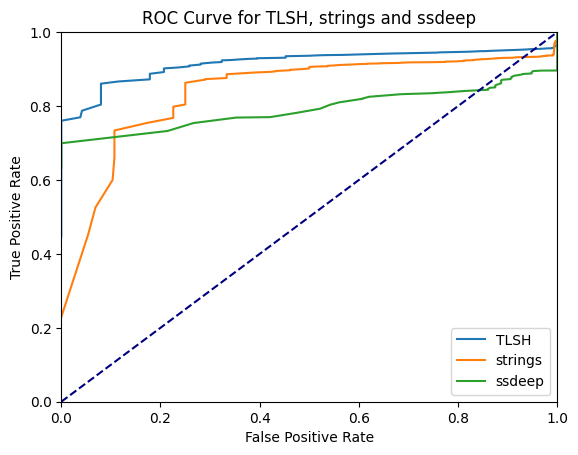

In [24]:
# plot the roc curve of variable 'd', 't', 's'
plt.plot(p["false_positive_rate"], p["true_positive_rate"], label="TLSH")
plt.plot(s["false_positive_rate"], s["true_positive_rate"], label="strings")
plt.plot(d["false_positive_rate"], d["true_positive_rate"], label="ssdeep")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for TLSH, strings and ssdeep")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

In [25]:
# calculate the area under the curve for variable 'd', 't', 's'
from sklearn.metrics import auc
print(f"TLSH: {auc(p['false_positive_rate'], p['true_positive_rate'])}")
print(f"strings: {auc(s['false_positive_rate'], s['true_positive_rate'])}")
print(f"ssdeep: {auc(d['false_positive_rate'], d['true_positive_rate'])}")

TLSH: 0.91606192712747
strings: 0.83813903075119
ssdeep: 0.7925144803328277


In [26]:
def ssdeep_f1(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (1,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + FN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
f1_ssdeep = ssdeep_f1(ssdeep_comb())
f1_ssdeep

,threshold,f1,accuracy,precision,recall
1,1.0,0.882291,0.876660,0.864865,0.900433
2,2.0,0.882291,0.876660,0.864865,0.900433
3,3.0,0.882291,0.876660,0.864865,0.900433
4,4.0,0.882291,0.876660,0.864865,0.900433
5,5.0,0.882291,0.876660,0.864865,0.900433
...,...,...,...,...,...
95,95.0,0.837209,0.924731,0.976744,0.732558
96,96.0,0.837209,0.924731,0.976744,0.732558
97,97.0,0.823077,0.932927,1.000000,0.699346
98,98.0,0.774510,0.912409,1.000000,0.632000


In [27]:
f1_tlsh

,threshold,f1,accuracy,precision,recall
0,0.0,0.783692,0.644320,0.644320,1.0
1,1.0,0.777303,0.635728,0.635728,1.0
2,2.0,0.770156,0.626710,0.626223,1.0
3,3.0,0.766789,0.623026,0.621782,1.0
4,4.0,0.762733,0.618509,0.616466,1.0
...,...,...,...,...,...
295,295.0,NaN,0.428571,0.000000,0.0
296,296.0,NaN,0.428571,0.000000,0.0
297,297.0,NaN,0.428571,0.000000,0.0
298,298.0,NaN,0.428571,0.000000,0.0


<Axes: title={'center': 'F1 Score for TLSH'}, xlabel='threshold'>

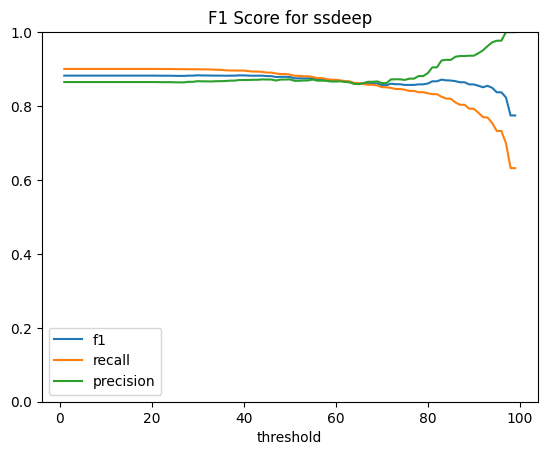

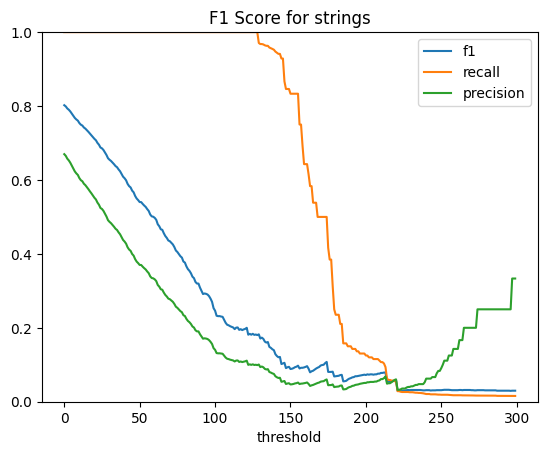

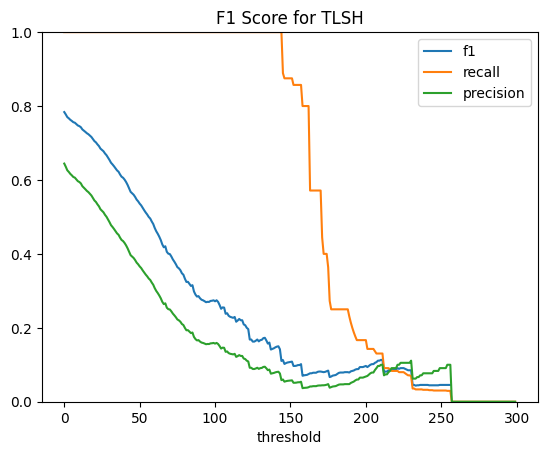

In [28]:
f1_ssdeep.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for ssdeep")
f1_str.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for strings")
f1_tlsh.plot(x="threshold", y=["f1","recall", "precision"], ylim=[0,1] ,title="F1 Score for TLSH")

# Machoke

In [29]:
machoke_df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
26,26,libgd,98323a0d7a04d490c8c3fa65eba54580d6424a105e9ea1...,12256,{'ssdeep': '192:G4MFkE1i1psbJcIflb1U2eVoc8Ngcf...,sdhash hash,{'tlsh': 'T16942944FE76259BFDAD94238588B0B7073...,Machoc hash,{'strings': 'T1EC31784CE67BE47779D73668770E0E1...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
54,46,hwloc,fb0d766180b9b7660a152ac2a8f34038bbfde6d042341c...,18216,{'ssdeep': '192:GnR37uG3EE2ntzHlZfZZJVoRxsXAZs...,sdhash hash,{'tlsh': 'T1D782D98BDAE08937D4E05234589B0A2079...,Machoc hash,{'strings': 'T15871724D2579F53379A22578AA5C4C0...,3db8a17a1a02300e1a02300ec19ce261a02300ea247ec5...,False
55,47,hwloc,53b571e7d5faa63ffab2afadb549c0a217a4018bb8a180...,46688,{'ssdeep': '768:46R8Xdf+eMWtO3lkCKsooHtUJf6nP7...,sdhash hash,{'tlsh': 'T19C231A079BD18479D5E08130A9DB6B12A6...,Machoc hash,{'strings': 'T1663298120FA6D42377E20579FF94BF4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
56,48,hwloc,839236bb57cfcc2db79239f199608ae30faf26c5efca13...,27216,{'ssdeep': '384:cbDbynRaDQt7U0J9Ug7TBtS/4UnQ1S...,sdhash hash,{'tlsh': 'T199C23D8BE7F14CBBD8D89630686B0B24A6...,Machoc hash,{'strings': 'T1B4C1B8851DBAB0137EA22A2CFF6D8D4...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
57,49,hwloc,3cb3182958db8bf2b1cc137ae2ac0c618f97332c4aa564...,46712,{'ssdeep': '768:iaj3CUxjbUpOlmbVylUMqIhtVBHtUJ...,sdhash hash,{'tlsh': 'T1E32319079B918474C4D5C130ADDBAB26AA...,Machoc hash,{'strings': 'T10E2297270F66D423A6E20575FF94BE4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
...,...,...,...,...,...,...,...,...,...,...,...
2042,1974,SeqPrep,957a077e1db255eb416420317fb4fa678d61be947919c4...,106776,{'ssdeep': '1536:3H8sLvPPk1YK1s7yLLu0g0HBlb/fW...,sdhash hash,{'tlsh': 'T1CFA3F73BFF67901DC34B96780DE280AD66...,Machoc hash,{'strings': 'T15232291601BEF822C7C3FA2AA34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2043,1975,SeqPrep,2023b37b9df662cda1454fdc0dfff693686d4ff9fb9ae2...,96360,{'ssdeep': '768:DpcvgRDFlFOCPku1cnTqZxXj7TUS8Y...,sdhash hash,{'tlsh': 'T1E193E83BFFA7901DC34A957809E381E2A6...,Machoc hash,{'strings': 'T115424C1615BEE422C2C3FA667388481...,3db8a17a1a02300e5713ec025713ec02c19ce26c4d3411...,False
2044,1976,SeqPrep,a2163b07a13d1b0a86db3f582e3ec6a8c2d9b45a7d85e0...,106816,{'ssdeep': '1536:ojAqutuBk1vrT4xl4FRlN1rUkLlb/...,sdhash hash,{'tlsh': 'T122A3F83BFF67901EC34B96380DE280AD66...,Machoc hash,{'strings': 'T1D932391601BEE822C3C3FA2AB34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2045,1977,Qhull,f1d0863b5c5bbbe387d77d724d49291152fcfd654c8498...,384752,{'ssdeep': '6144:RLnCLZZoerNhFTkojdX0ke6hJh62P...,sdhash hash,{'tlsh': 'T193845B9B37D218FDD8D28430825B5257FF...,Machoc hash,{'strings': 'T1B2A32AF12F40269395E301A68305625...,3db8a17a1a02300e153362cabde1558fc0dbd3be2ec3a4...,False


In [33]:
from itertools import combinations
from sklearn.metrics import jaccard_score
def jaccard_distance_sklearn(str1, str2, n=8):
    # Function to generate n-grams from a string
    def ngrams(s, n):
        return set([s[i:i+n] for i in range(len(s) - n + 1)])

    # Convert inputs to strings if they are not
    str1 = str(str1) if not isinstance(str1, str) else str1
    str2 = str(str2) if not isinstance(str2, str) else str2

    # Create n-grams for each string
    set1 = ngrams(str1, n)
    set2 = ngrams(str2, n)

    # Calculate Jaccard similarity and convert to distance
    if len(set1.union(set2)) == 0:  # Avoid division by zero
        return 1.0 if set1 != set2 else 0.0
    similarity = len(set1.intersection(set2)) / len(set1.union(set2))

    return similarity


def machoke_comb(df):
    # get jaccard distance of all combinations

    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['machoke', 'family', 'malware']].iterrows(), 2)
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
    
        diff_score = jaccard_distance_sklearn(row1['machoke'], row2['machoke'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['malware'], row2['malware'], row1['machoke'], row2['machoke'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['machoke'], row2['machoke'], diff_score))
    
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'Machoke 1', 'Machoke 2', 'Diff Score'])
    return results_df

#machoke_best = machoke_comb(df=machoke_df)

machoke_best = pd.DataFrame(columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'Machoke 1', 'Machoke 2', 'Diff Score'])


In [36]:
# multiply machoke_best[score] by 100
machoke_best["Diff Score"] = machoke_best["Diff Score"] * 100

In [38]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_comp = result_ssdeep.loc[result_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
string_comp = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]
machoke_comp = machoke_best.loc[machoke_best.groupby('Machoke 1')["Diff Score"].idxmax()]
tls = []
ssd = []
strs = []
mach = []
for i in range (0,310,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    string_comp_diff = string_comp[string_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Malware 1"] == False]
    string_comp_diff = string_comp_diff[string_comp_diff["Malware 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (string_comp_diff["Family 1"] == string_comp_diff["Family 2"]).sum() / len(string_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(string_comp_diff) / len(string_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh, i))
    strs.append((winrate_str, 1-winrate_str, total_str, i))
for j in range (1,110,10):
    ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] >= j]
    machoke_comp_diff = machoke_comp[machoke_comp["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Malware 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    win_machoke = (machoke_comp_diff["Family 1"] == machoke_comp_diff["Family 2"]).sum() / len(machoke_comp_diff) if len(machoke_comp_diff) != 0 else 0
    total = len(ssdeep_comp_diff) / len(ssdeep_comp)
    total_machoke = len(machoke_comp_diff) / len(machoke_best) if len(machoke_comp_diff) != 0 else 0
    ssd.append((winrate, 1-winrate, total,j))
    mach.append((win_machoke, 1-win_machoke, total_machoke,j))

<Figure size 640x480 with 0 Axes>

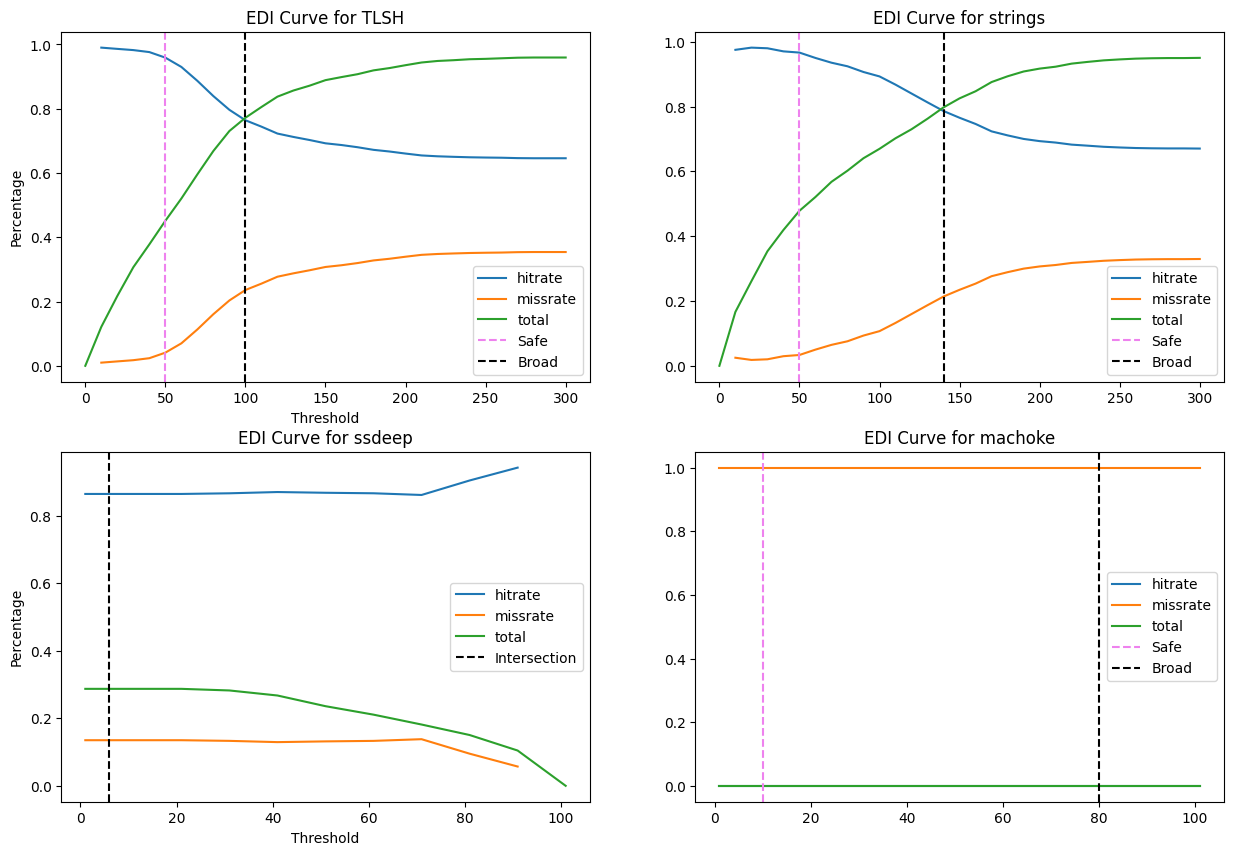

In [39]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
strt = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])
mchc = pd.DataFrame(mach, columns=["winrate", "lossrate", "total", "threshold"])
#ti = titi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for TLSH")
#si = sisi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for ssdeep")

plt.clf()
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].plot(titi["threshold"], titi["winrate"], label="hitrate")
ax[0][0].plot(titi["threshold"], titi["lossrate"], label="missrate")
ax[0][0].plot(titi["threshold"], titi["total"], label="total")
ax[0][0].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[0][0].axvline(x=100, color='black', linestyle='--', label='Broad')
ax[0][0].legend()
ax[0][0].set_title("EDI Curve for TLSH")
ax[0][0].set_xlabel("Threshold")
ax[0][0].set_ylabel("Percentage")
ax[1][0].plot(sisi["threshold"], sisi["winrate"], label="hitrate")
ax[1][0].plot(sisi["threshold"], sisi["lossrate"], label="missrate")
ax[1][0].plot(sisi["threshold"], sisi["total"], label="total")
ax[1][0].axvline(x=6, color='black', linestyle='--', label='Intersection')
ax[1][0].legend()
ax[1][0].set_title("EDI Curve for ssdeep")
ax[1][0].set_xlabel("Threshold")
ax[1][0].set_ylabel("Percentage")
ax[0][1].plot(strt["threshold"], strt["winrate"], label="hitrate")
ax[0][1].plot(strt["threshold"], strt["lossrate"], label="missrate")
ax[0][1].plot(strt["threshold"], strt["total"], label="total")
ax[0][1].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[0][1].axvline(x=140, color='black', linestyle='--', label='Broad')
ax[0][1].legend()
ax[0][1].set_title("EDI Curve for strings")
ax[1][1].plot(mchc["threshold"], mchc["winrate"], label="hitrate")
ax[1][1].plot(mchc["threshold"], mchc["lossrate"], label="missrate")
ax[1][1].plot(mchc["threshold"], mchc["total"], label="total")
ax[1][1].axvline(x=10, color='violet', linestyle='--', label='Safe')
ax[1][1].axvline(x=80, color='black', linestyle='--', label='Broad')
ax[1][1].legend()
ax[1][1].set_title("EDI Curve for machoke")
plt.show()

In [40]:
mchc

,winrate,lossrate,total,threshold
0,0,1,0,1
1,0,1,0,11
2,0,1,0,21
3,0,1,0,31
4,0,1,0,41
5,0,1,0,51
6,0,1,0,61
7,0,1,0,71
8,0,1,0,81
9,0,1,0,91


In [41]:
machoke_comp.sort_values(by="Diff Score", ascending=False)

,Family 1,Family 2,Malware 1,Malware 2,Machoke 1,Machoke 2,Diff Score


In [42]:
a = df
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a['tlsh'] = a['tlsh'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
time_df = a

In [43]:
time_df.sort_values(by='file_size', ascending=False)

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
1365,1315,DiscovarDenovo,01ad5c5d5001a0764424fcc68910f20effb1e49758d4d1...,385792472,1.843785,sdhash hash,1.499128,Machoc hash,0.938669,NaN
2011,1943,ORCA,41a33997638a0e9bf803e102a2f7fa93c5bfdd889ebc32...,353969384,1.791069,sdhash hash,1.394331,Machoc hash,1.077088,NaN
2010,1942,ORCA,2c1d5554d87ea32f26ba781d01099e456d561b6df14358...,353944808,1.758654,sdhash hash,228.479217,Machoc hash,1.229511,NaN
2013,1945,ORCA,a484340963524497ff1a55cbdf0e2f0f3a4b430233a3eb...,353899752,1.742454,sdhash hash,1.378933,Machoc hash,1.158988,NaN
637,607,NWChem,6c88a2637ba83e6c19bcc2a92ebb42f7e84a591b8d7578...,166770264,0.677075,sdhash hash,0.657506,Machoc hash,0.496268,NaN
...,...,...,...,...,...,...,...,...,...,...
399,371,Aspera-Connect,34f453065c1f18b70686c47a766288b070b8ca8609449b...,126,0.000008,sdhash hash,0.000005,Machoc hash,0.009793,NaN
1337,1287,HTSeq,4a4ba3cd9010d5ae2d5e8d34d1b0581e52f5a8afd7e40f...,112,0.000008,sdhash hash,0.000004,Machoc hash,0.012141,NaN
1114,1070,PyQt5,7325f78659ffdb40d06e4857334ad983f9ab98b6debafc...,101,0.000052,sdhash hash,0.000015,Machoc hash,0.014948,{'machoke': 'Not a valid binary file /users/st...
1115,1071,PyQt5,e529bcb954f6c53f737f1288daff376f0b42778808051d...,99,0.000024,sdhash hash,0.000010,Machoc hash,0.010639,{'machoke': 'Not a valid binary file /users/st...


In [44]:
# map median time to family and percentage of hit rate
def time_median(df):
    tlsh_time = []
    ssdeep_time = []
    string_time = []
    for family in df['Family 1'].unique():

        values = time_df[time_df['family'] == family]['tlsh'].tolist()
        median = np.median(values) if values else np.nan
        amount = len(values)
        tmp = df[df['Family 1'] == family]
        percentage = (tmp["Family 1"] == tmp["Family 2"]).sum() / len(df) * 100
        tlsh_time.append({
            'family': family,
            'values': values,
            'median_time': median,
            'median_size': time_df[time_df['family'] == family]["file_size"].median(),
            'amount': amount,
            'percentage': percentage
        })
        
    return pd.DataFrame(tlsh_time)

tlsh_median = time_median(results_tlsh)

tlsh_median.dropna(subset=['median_time'], inplace=True)

In [45]:
tlsh_median = tlsh_median[tlsh_median['amount'] > 1]

In [46]:
# Convert the column to float
tlsh_median["median_size"] = tlsh_median["median_size"].astype(float)

# Now call describe
tlsh_median["median_size"].describe().to_frame()

,median_size
count,3.270000e+02
mean,4.768980e+06
std,2.302292e+07
min,9.900000e+01
25%,1.527100e+04
50%,1.435440e+05
75%,1.395700e+06
max,3.539223e+08


<Figure size 640x480 with 0 Axes>

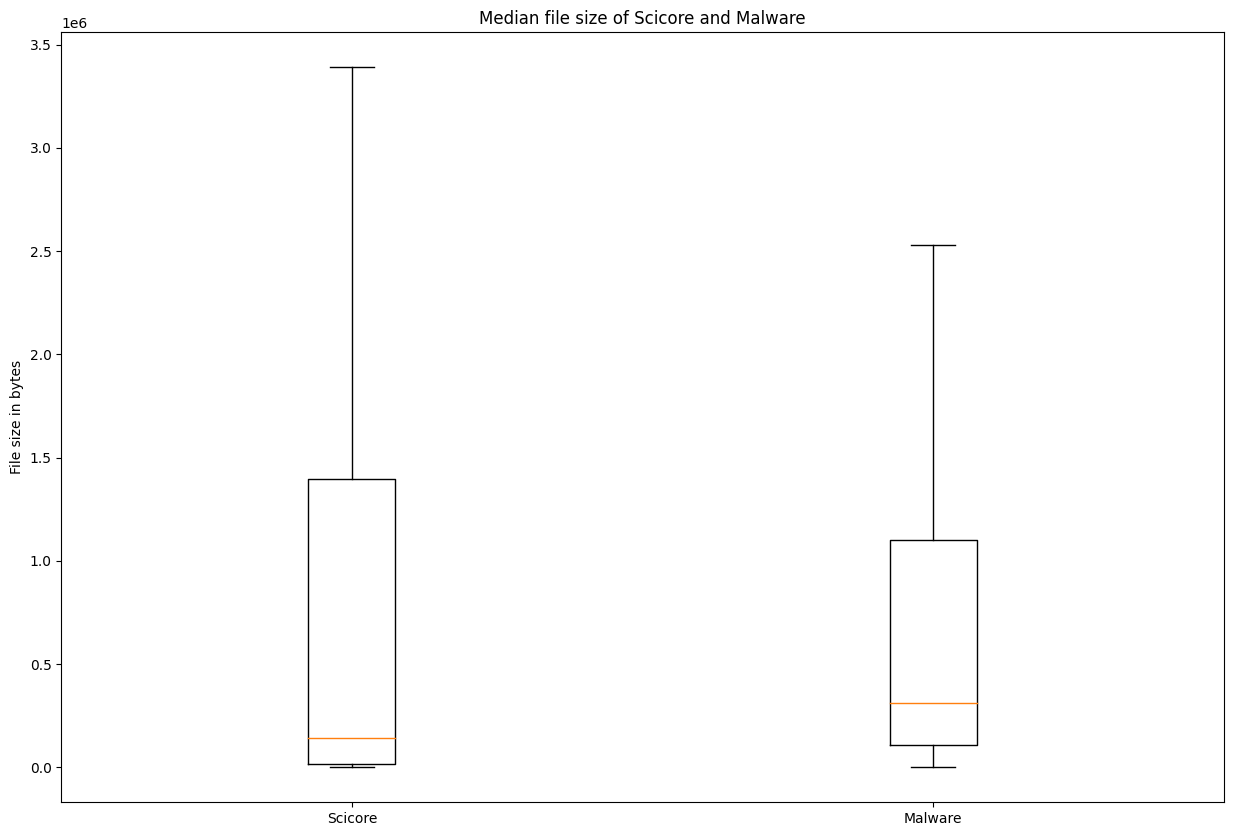

In [57]:
# load tlsh_median_size.csv to create the malware boxplot and put both into one plot
malware_median = pd.read_csv("tlsh_median_size.csv")
malware_median["median_size"].describe().to_frame()
malware_median["median_size"] = malware_median["median_size"].astype(float)

# make one plot with both boxplots
plt.clf()
fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot([tlsh_median["median_size"], malware_median["median_size"]], labels=["Scicore", "Malware"],showfliers=False)
ax.set_title("Median file size of Scicore and Malware")
ax.set_ylabel("File size in bytes")
plt.show()





In [47]:
tlsh_median.sort_values(by='percentage', ascending=False)

# calculate the correlation coefficeint between median time and percentage
from scipy.stats import pearsonr
pearsonr(tlsh_median['median_size'], tlsh_median['percentage'])

PearsonRResult(statistic=-0.04112132502580719, pvalue=0.4586517776819086)

In [48]:
tmp = results_tlsh[results_tlsh["Family 1"] == "ORCA"]
if len(tmp) != 0:
    print((tmp["Family 1"] == tmp["Family 2"]).sum() / len(tmp) * 100)
tmp

1.8018018018018018


,Family 1,Family 2,Malware 1,Malware 2,TLSH 1,TLSH 2,Diff Score
1621669,ORCA,ORCA,False,False,T17EF8D22171E01E7CD9D77836206B3622F6553A68492D...,T145F8D22171E01E7CD9DB7836206B3622F6553A64492D...,3
1621670,ORCA,ORCA,False,False,T17EF8D22171E01E7CD9D77836206B3622F6553A68492D...,T145F8D22171E01E7CD9DB7836206B3622F6553A64492D...,3
1621671,ORCA,ORCA,False,False,T17EF8D22171E01E7CD9D77836206B3622F6553A68492D...,T1BFF8D22171E01E7CD9D77836206B3622F6553A68492D...,1
1621672,ORCA,ORCA,False,False,T17EF8D22171E01E7CD9D77836206B3622F6553A68492D...,T104D77C46F4FA04E7CDD5F4741657F1AA36713821301A...,472
1621673,ORCA,Qt5,False,False,T17EF8D22171E01E7CD9D77836206B3622F6553A68492D...,T11CA2E877BA918D79C0C48B3058DB85226237BE31EE32...,1451
...,...,...,...,...,...,...,...
1622219,ORCA,Bashlite,False,True,T104D77C46F4FA04E7CDD5F4741657F1AA36713821301A...,T1CF631981A741DAB3E11300F116AFEB260632FE3F9866...,1135
1622220,ORCA,GandCrab,False,True,T104D77C46F4FA04E7CDD5F4741657F1AA36713821301A...,T111636A0EA2E1A193E1F357B9FA757E65446E3D203B28...,1038
1622221,ORCA,Sakula,False,True,T104D77C46F4FA04E7CDD5F4741657F1AA36713821301A...,T1BA835B26B691C033E062113445B9E6735A7EF9324B7C...,1039
1622222,ORCA,OnlinerSpambot,False,True,T104D77C46F4FA04E7CDD5F4741657F1AA36713821301A...,T1A0651276F191C472D0721A7D9C1AE1D8AE2EFE205E74...,772


<Axes: ylabel='Frequency'>

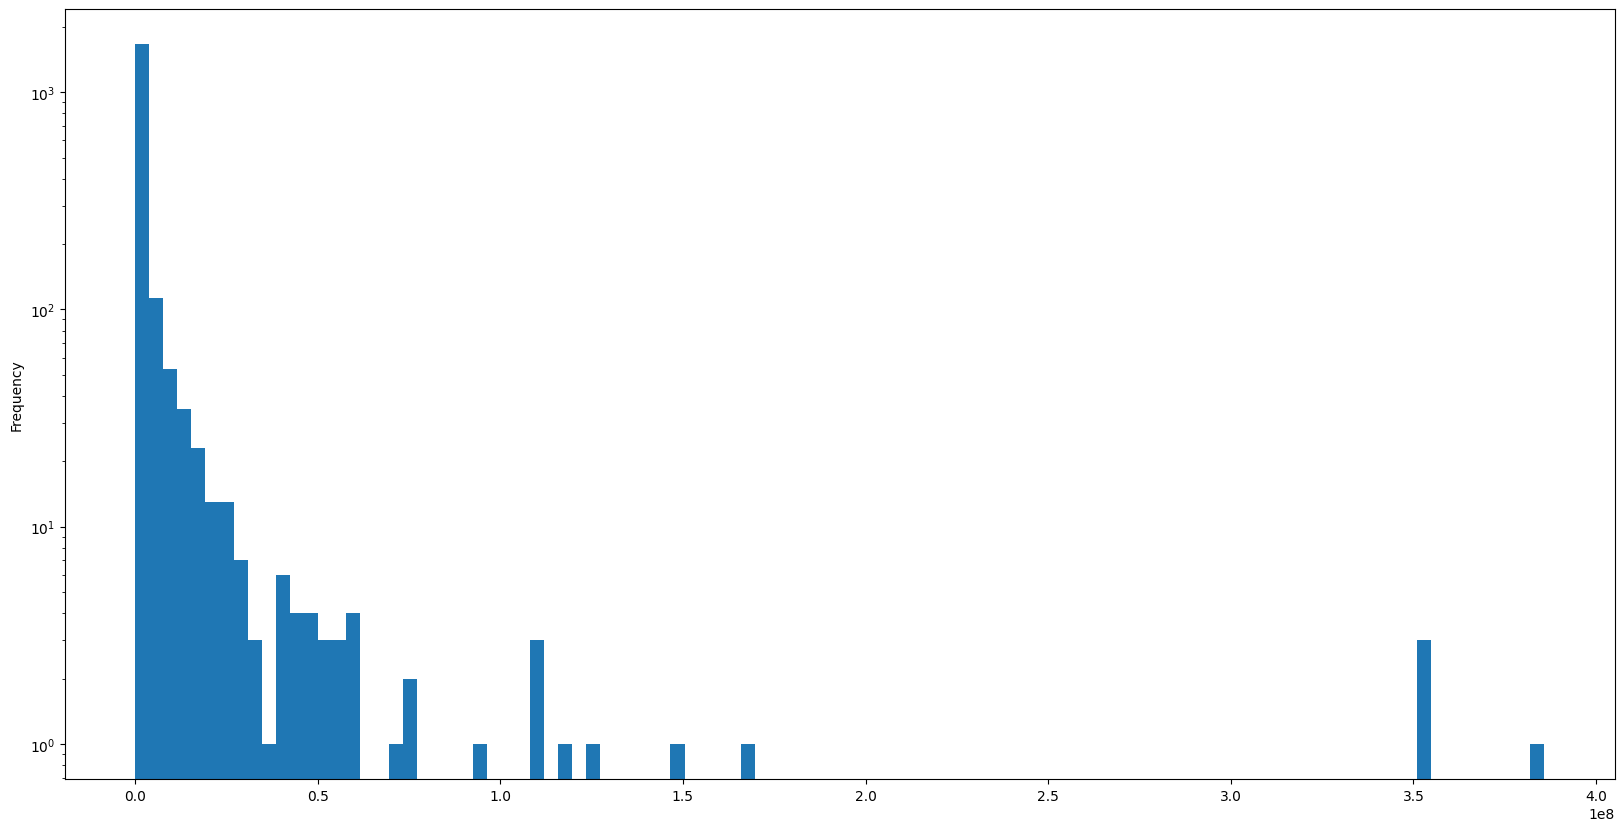

In [49]:
time_df["file_size"].plot(kind='hist', bins=100, figsize=(20, 10),logy=True)

In [50]:
(time_df["file_size"] > 10000).sum()

1578